DATA PREPROCESSING FOR CSL2050: COURSE PROJECT

In [1]:
#Importing Necessary Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
import nltk
import wordcloud
from sklearn.svm import LinearSVC
import warnings
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline
nltk.download('stopwords')
warnings.filterwarnings('ignore')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


In [2]:
#Importing Necessary Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
import nltk
import wordcloud
from sklearn.svm import LinearSVC
import warnings
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline
nltk.download('stopwords')
warnings.filterwarnings('ignore')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


In [3]:
#Importing the dataset:
file_path = 'Dataset/data.csv'
df = pd.read_csv(file_path, encoding='Windows-1252')
df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Kmï¿½),Density (P/Kmï¿½)
0,cb774db0d1,"I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...
31010,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554,120340.0,55
31011,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644,1266700.0,19
31012,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589,910770.0,226
31013,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816,120410.0,214


In [4]:
#Basic Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31015 entries, 0 to 31014
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   textID             31015 non-null  object 
 1   text               31014 non-null  object 
 2   sentiment          31015 non-null  object 
 3   Time of Tweet      31015 non-null  object 
 4   Age of User        31015 non-null  object 
 5   Country            31015 non-null  object 
 6   Population -2020   31015 non-null  int64  
 7   Land Area (Kmï¿½)  31015 non-null  float64
 8   Density (P/Kmï¿½)  31015 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 2.1+ MB


In [5]:
#Converting text object which is float by default to string:
df['text'] = df['text'].astype(str)
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Kmï¿½),Density (P/Kmï¿½)
0,cb774db0d1,"I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,noon,60-70,Angola,32866272,1246700.0,26


In [6]:
print("Sentiment Analysis Dataset: Features")
print("Continunous features: 'text ID, text, Population, Land Area, Density'")
print("Categorical features with value counts:")
print(df['sentiment'].value_counts())
print(df['Time of Tweet'].value_counts())
print(df['Age of User'].value_counts())
print(df['Country'].value_counts())

Sentiment Analysis Dataset: Features
Continunous features: 'text ID, text, Population, Land Area, Density'
Categorical features with value counts:
sentiment
neutral     12548
positive     9685
negative     8782
Name: count, dtype: int64
Time of Tweet
morning    10339
noon       10338
night      10338
Name: count, dtype: int64
Age of User
0-20      5171
21-30     5170
31-45     5170
46-60     5168
60-70     5168
70-100    5168
Name: count, dtype: int64
Country
Afghanistan        169
Ecuador            169
Chile              169
China              169
Colombia           169
                  ... 
Singapore          144
Slovakia           144
Slovenia           144
Solomon Islands    144
Zimbabwe           144
Name: count, Length: 195, dtype: int64


In [7]:
column_name_mapping = {
    "Population -2020": "Population",
    "Land Area (Kmï¿½)": "Land Area",
    "Density (P/Kmï¿½)": "Density",
}

# Rename columns using the rename() method
df = df.rename(columns=column_name_mapping)
df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population,Land Area,Density
0,cb774db0d1,"I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...
31010,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554,120340.0,55
31011,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644,1266700.0,19
31012,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589,910770.0,226
31013,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816,120410.0,214


In [8]:
#Categorical Encoding of target variable:
df['sentiment'] = df['sentiment'].replace({'negative': 0, 'neutral': 1, 'positive': 2})

df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population,Land Area,Density
0,cb774db0d1,"I`d have responded, if I were going",1,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,0,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,0,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,0,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",0,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...
31010,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",0,noon,21-30,Nicaragua,6624554,120340.0,55
31011,416863ce47,All alone in this old house again. Thanks for...,2,night,31-45,Niger,24206644,1266700.0,19
31012,6332da480c,I know what you mean. My little dog is sinkin...,0,morning,46-60,Nigeria,206139589,910770.0,226
31013,df1baec676,_sutra what is your next youtube video gonna b...,2,noon,60-70,North Korea,25778816,120410.0,214


<Axes: xlabel='Density', ylabel='sentiment'>

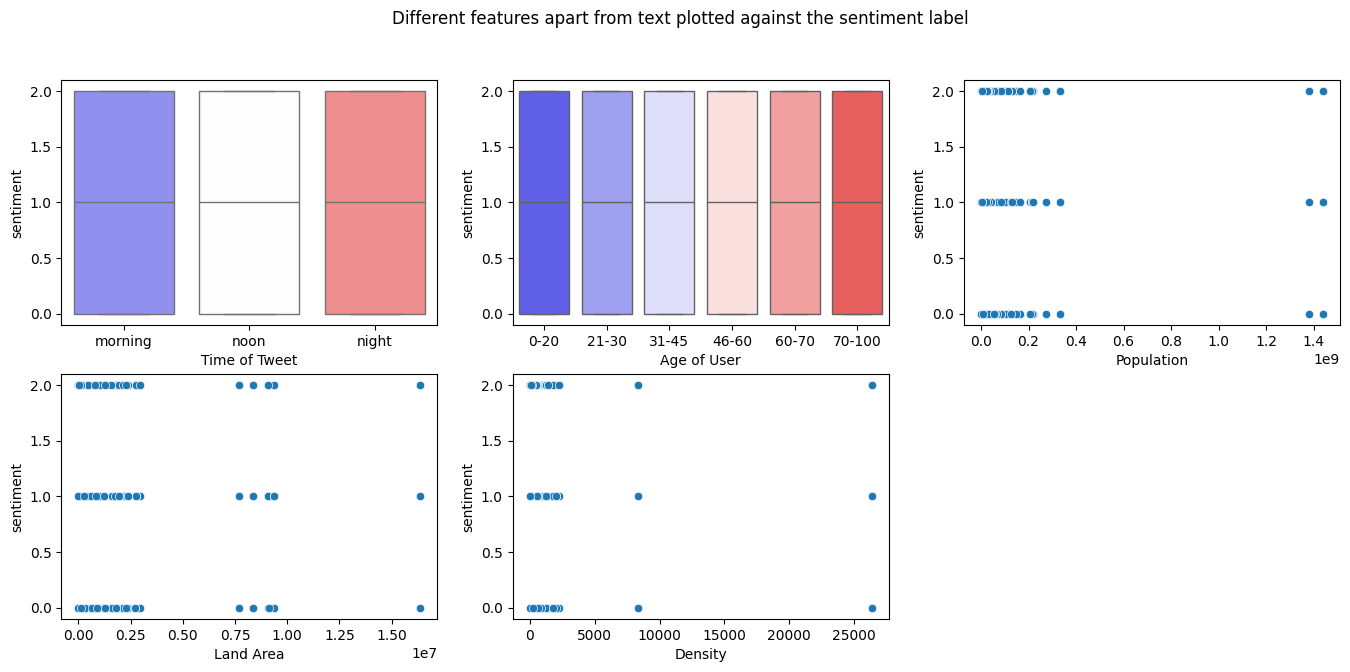

In [9]:
#Visualize target variable against other features:
#check for outliers
figure, axes = plt.subplots(2, 3, figsize = (16.5, 7))
figure.suptitle("Different features apart from text plotted against the sentiment label")
figure.delaxes(axes[1][2])

sns.boxplot(ax = axes[0, 0], data = df, x = "Time of Tweet", y = "sentiment", palette = "bwr")
sns.boxplot(ax = axes[0, 1], data = df, x = "Age of User", y = "sentiment", palette = "bwr")
sns.scatterplot(ax = axes[0, 2], data = df, x = "Population", y = "sentiment", palette = "bwr")
sns.scatterplot(ax = axes[1, 0], data = df, x = "Land Area", y = "sentiment", palette = "bwr")
sns.scatterplot(ax = axes[1, 1], data = df, x = "Density", y = "sentiment", palette = "bwr")

We observe that the dataset is a uniform sampling of the population, with respect to all the features.
Since the sampling is uniform and the there are outliers for Population, Land Area and Density and these features do not really reflect anything about the sentiment if the distribution is uniform, we decided to safely ignore them.

From the df.info(), it is clear that the dataset is complete with no null/missing values.

Categorical Encoding:

In [10]:
#Categorical Encoding of Time of Tweet:
df['Time of Tweet'] = df['Time of Tweet'].replace({'morning': 0, 'noon': 1, 'night': 2})
#Replacing Age of User by mean ages:
df['Age of User'] = df['Age of User'].replace({'0-20': 13, '21-30': 25, '31-45': 38, '46-60': 52, '60-70': 65, '70-100': 85})
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population,Land Area,Density
0,cb774db0d1,"I`d have responded, if I were going",1,0,13,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,0,1,25,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,0,2,38,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,0,0,52,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",0,1,65,Angola,32866272,1246700.0,26


Text Processing:

In [11]:
# Function to detect pattern and remove from text:
def remove_pattern(txt_input, pat):
    r = re.findall(pat, txt_input)
    for word in r:
        txt_input = re.sub(word,"",txt_input)
    return txt_input

In [12]:
# Remove special characters, numbers and other punctuations:
df['processed_text'] = df['text'].str.replace("[^a-zA-Z#]"," ")
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population,Land Area,Density,processed_text
0,cb774db0d1,"I`d have responded, if I were going",1,0,13,Afghanistan,38928346,652860.0,60,"I`d have responded, if I were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,0,1,25,Albania,2877797,27400.0,105,Sooo SAD I will miss you here in San Diego!!!
2,088c60f138,my boss is bullying me...,0,2,38,Algeria,43851044,2381740.0,18,my boss is bullying me...
3,9642c003ef,what interview! leave me alone,0,0,52,Andorra,77265,470.0,164,what interview! leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",0,1,65,Angola,32866272,1246700.0,26,"Sons of ****, why couldn`t they put them on t..."


In [13]:
#Converting processed test to lowercase:
df['processed_text'] = df['processed_text'].str.lower()
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population,Land Area,Density,processed_text
0,cb774db0d1,"I`d have responded, if I were going",1,0,13,Afghanistan,38928346,652860.0,60,"i`d have responded, if i were going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,0,1,25,Albania,2877797,27400.0,105,sooo sad i will miss you here in san diego!!!
2,088c60f138,my boss is bullying me...,0,2,38,Algeria,43851044,2381740.0,18,my boss is bullying me...
3,9642c003ef,what interview! leave me alone,0,0,52,Andorra,77265,470.0,164,what interview! leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",0,1,65,Angola,32866272,1246700.0,26,"sons of ****, why couldn`t they put them on t..."


In [14]:
#Stemming function :
stemmer = nltk.PorterStemmer()
def stemm_text(txt_input):
    stemmed_txt = txt_input.split()
    stemmed_txt = [stemmer.stem(word) for word in stemmed_txt if not word in stopwords.words('english')]
    stemmed_txt = " ".join(stemmed_txt)
    return stemmed_txt

In [15]:
# Stemming and removing stopwords:
df['processed_text'] = df['processed_text'].apply(stemm_text)
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population,Land Area,Density,processed_text
0,cb774db0d1,"I`d have responded, if I were going",1,0,13,Afghanistan,38928346,652860.0,60,"i`d responded, go"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,0,1,25,Albania,2877797,27400.0,105,sooo sad miss san diego!!!
2,088c60f138,my boss is bullying me...,0,2,38,Algeria,43851044,2381740.0,18,boss bulli me...
3,9642c003ef,what interview! leave me alone,0,0,52,Andorra,77265,470.0,164,interview! leav alon
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",0,1,65,Angola,32866272,1246700.0,26,"son ****, couldn`t put releas alreadi bought"


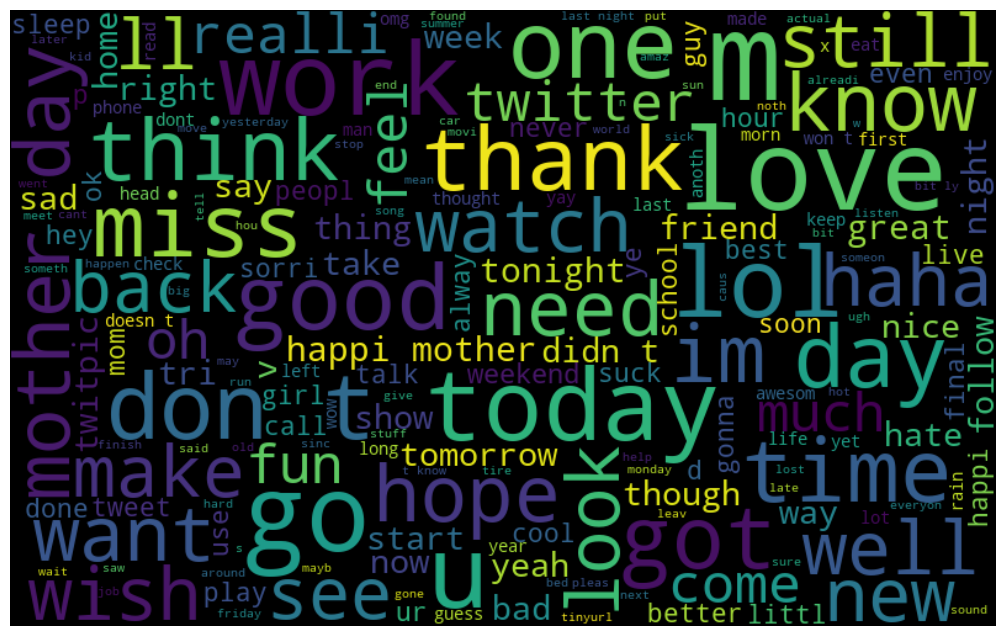

In [16]:
#Visualize the frequent words:
all_words = " ".join([i for i in df['processed_text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#Plot:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

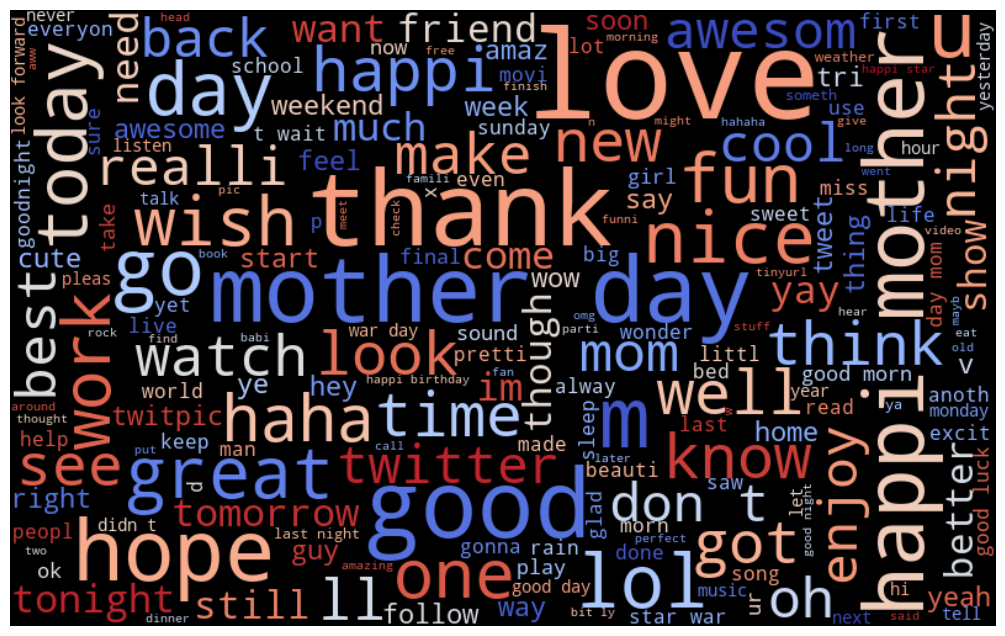

In [17]:
#Visualize the positive frequent words:
positive_words = " ".join([i for i in df['processed_text'][df['sentiment']==2]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,colormap='coolwarm',random_state=42,max_font_size=100).generate(positive_words)

#Plot:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

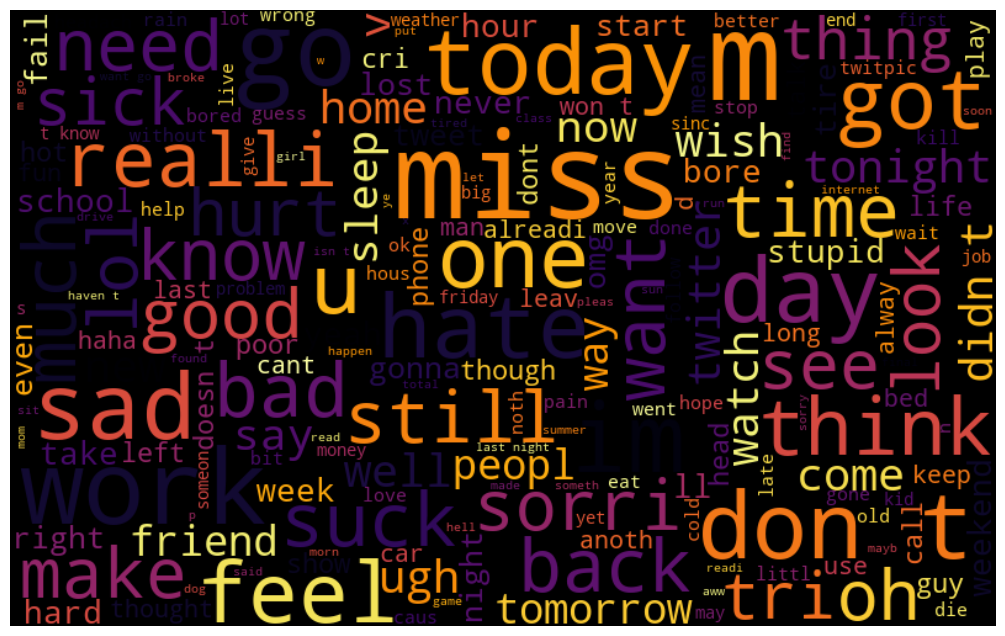

In [18]:
#Visualize the negative words:
negative_words = " ".join([i for i in df['processed_text'][df['sentiment']==0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,colormap='inferno',random_state=42,max_font_size=100).generate(negative_words)

#Plot:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

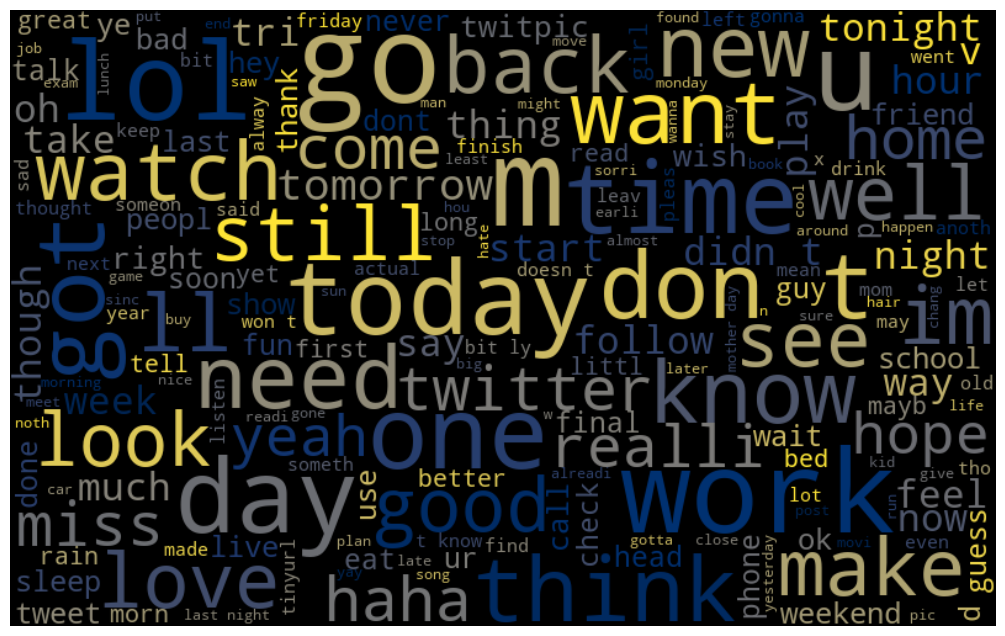

In [19]:
#Visualize the neutral frequent words:
neutral_words = " ".join([i for i in df['processed_text'][df['sentiment']==1]])


from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,colormap='cividis',random_state=42,max_font_size=100).generate(neutral_words)

#Plot:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
#Dropping irrelevent features:
X = df.drop(columns=['textID','text','Country','Population','Density','Land Area','sentiment'])
y = df['sentiment']
print(X.head(),y)

   Time of Tweet  Age of User                                processed_text
0              0           13                             i`d responded, go
1              1           25                    sooo sad miss san diego!!!
2              2           38                              boss bulli me...
3              0           52                          interview! leav alon
4              1           65  son ****, couldn`t put releas alreadi bought 0        1
1        0
2        0
3        0
4        0
        ..
31010    0
31011    2
31012    0
31013    2
31014    2
Name: sentiment, Length: 31015, dtype: int64


In [21]:
#Train test split:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
#Vectorizing Text:

# Convert 'processed_text' column to list of strings
train_texts = x_train['processed_text'].tolist()
test_texts = x_test['processed_text'].tolist()

vectorizer = TfidfVectorizer()
train_matrix = vectorizer.fit_transform(train_texts)
test_matrix = vectorizer.transform(test_texts)

In [23]:
#Converting the other features to numpy arrays and stacking them with the sparse matrices:
train_time_of_tweet = np.array(x_train['Time of Tweet']).reshape(-1, 1)
test_time_of_tweet = np.array(x_test['Time of Tweet']).reshape(-1, 1)
train_age = np.array(x_train['Age of User']).reshape(-1, 1)
test_age = np.array(x_test['Age of User']).reshape(-1, 1)

X_train = sparse.hstack([train_age, train_time_of_tweet, train_matrix])
X_test = sparse.hstack([test_age, test_time_of_tweet, test_matrix])
# X_train = X_train.reset_index(drop=True)
# X_test = X_test.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)
# y_test = y_test.reset_index(drop=True)
# print(X_train)
# print(X_train.head)

Processed Data: X_train, X_test, y_train, y_test : 80-20 split.

Feature data is in the form of sparse matrix required to store vectorized words. Other features information(i.e. age and time) is stacked on this sparse matrix. In case you require to perform any special sort of model specific pre-processing, then perform it on 'x_train' and 'x_test'(dataframes) and then convert to X_train and X_split by stacking again.

In [24]:

# Create a Linear SVM classifier
svm = LinearSVC()

# Train the classifier
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, y_pred)

print("Accuracy (Linear SVM):", accuracy_svc)



Accuracy (Linear SVM): 0.6719329356762856


In [25]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = svm_linear.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy (Linear Kernel):", accuracy_linear)


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.62      0.67      1765
           1       0.65      0.77      0.70      2549
           2       0.78      0.70      0.74      1889

    accuracy                           0.71      6203
   macro avg       0.72      0.70      0.70      6203
weighted avg       0.71      0.71      0.71      6203

Accuracy (Linear Kernel): 0.7053038852168305


In [26]:
# Create an SVM classifier with polynomial kernel

svm_poly = SVC(kernel='poly',C=5,degree=7)


svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(classification_report(y_test, y_pred_poly))


print("Accuracy (Polynomial Kernel):", accuracy_poly)

from mpl_toolkits.mplot3d import Axes3D

# Define the datapoints
data = [
    [0.1, 3, 41.09],
    [0.1, 4, 41.09],
    [0.1, 5, 41.09],
    [0.1, 7, 42.04],
    [1, 3, 41.09],
    [1, 5, 42.41],
    [1, 7, 45.04],

    [5, 3, 42.12],
    [5, 4, 44.01],
    [5, 5, 45.64],
    [5, 7, 45.98]
]

# Separate the datapoints into variables
a = [d[0] for d in data]
b = [d[1] for d in data]
c = [d[2] for d in data]

# Create a 3D scatter plot
fig = plt.figure(figsize=(12,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a, b, c, c='r', marker='o')

ax.set_xlabel('C values')
ax.set_ylabel('Degree values')
ax.set_zlabel('Accuracies as obtained from polynomial kernel')
ax.set_zlim(35,50)
for i in range(len(data)):
    ax.text(a[i], b[i], c[i], '%d' % c[i], color='black', fontsize=10, ha='center', va='bottom')
    ax.plot([a[i], a[i]], [b[i], b[i]], [35, c[i]], linestyle='--', color='gray', linewidth=0.5)
    ax.plot([a[i], a[i]], [2, b[i]], [c[i], c[i]], linestyle='--', color='gray', linewidth=0.5)
    ax.plot([1, a[i]], [b[i], b[i]], [c[i], c[i]], linestyle='--', color='gray', linewidth=0.5)


plt.show()

# Plot acc against c
plt.figure(figsize=(8, 6))
plt.plot(a, c, marker='o', linestyle='-')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('Accuracy variation with c-value')
plt.grid(True)
plt.ylim(35, max(c))
plt.show()

# Plot acc against degree
plt.figure(figsize=(8, 6))
plt.plot(b, c, marker='o', linestyle='-')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.title('Accuracy variation with degree')
plt.grid(True)
plt.ylim(35, max(c))
plt.show()


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1765
           1       0.41      1.00      0.58      2549
           2       0.00      0.00      0.00      1889

    accuracy                           0.41      6203
   macro avg       0.14      0.33      0.19      6203
weighted avg       0.17      0.41      0.24      6203

Accuracy (RBF kernel): 0.4109301950669031


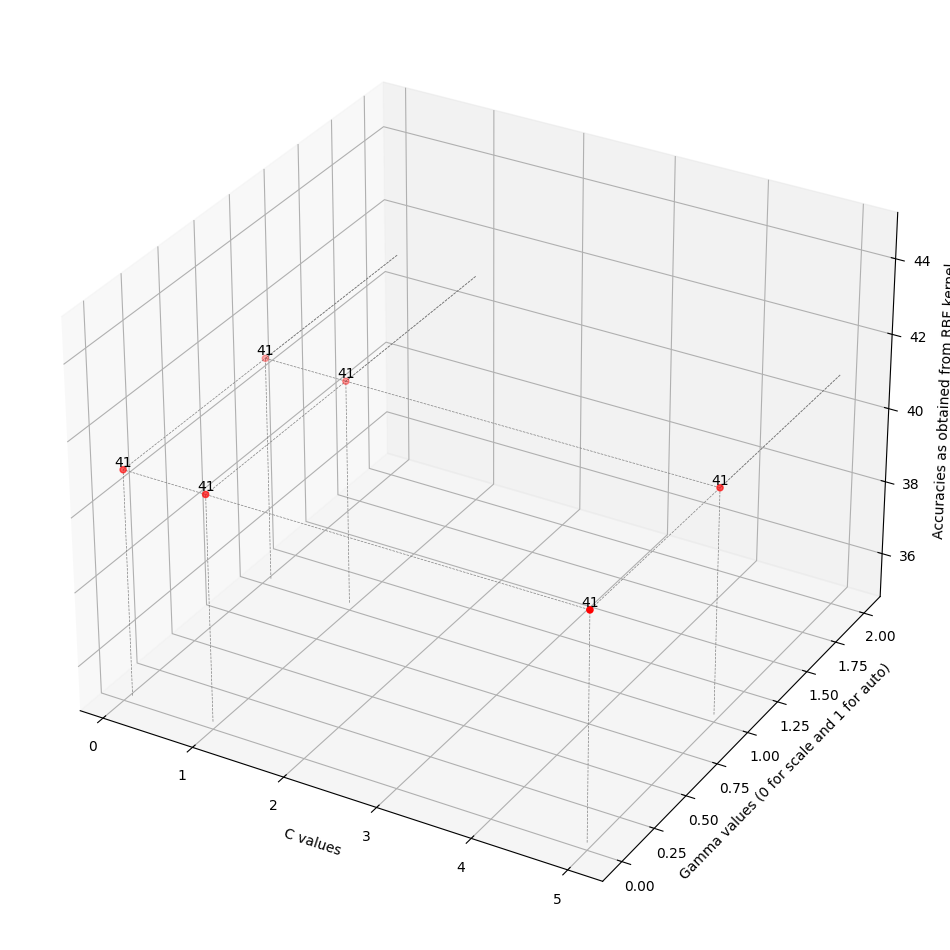

In [ ]:
# Create an SVM classifier with rbf kernel

svm_rbf = SVC(kernel='rbf',C=5,gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(classification_report(y_test, y_pred_rbf))

print("Accuracy (RBF kernel):", accuracy_rbf)

# Define the datapoints
data = [
    [0.1, 0, 41.09],
    [0.1, 1, 41.09],
    [1, 0, 41.09],
    [1, 1, 41.09],
    [5, 0, 41.09],
    [5, 1, 41.09]
]

# Separate the datapoints into variables
a = [d[0] for d in data]
b = [d[1] for d in data]
c = [d[2] for d in data]

# Create a 3D scatter plot
fig = plt.figure(figsize=(12,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a, b, c, c='r', marker='o')

ax.set_xlabel('C values')
ax.set_ylabel('Gamma values (0 for scale and 1 for auto)')
ax.set_zlabel('Accuracies as obtained from RBF kernel')
ax.set_zlim(35,45)


for i in range(len(data)):
    ax.text(a[i], b[i], c[i], '%d' % c[i], color='black', fontsize=10, ha='center', va='bottom')
    ax.plot([a[i], a[i]], [b[i], b[i]], [35, c[i]], linestyle='--', color='gray', linewidth=0.5)
    ax.plot([a[i], a[i]], [2, b[i]], [c[i], c[i]], linestyle='--', color='gray', linewidth=0.5)
    ax.plot([1, a[i]], [b[i], b[i]], [c[i], c[i]], linestyle='--', color='gray', linewidth=0.5)

plt.show()



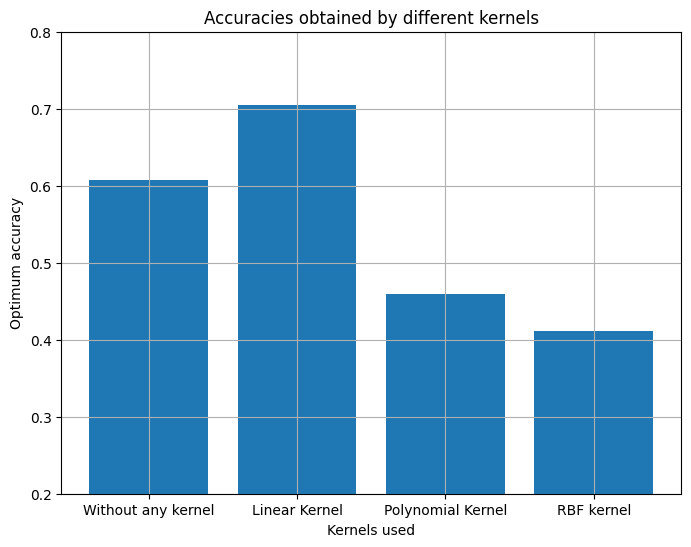

In [ ]:
# Define the datapoints
data = [
    ['Without any kernel', accuracy_svc],
    ['Linear Kernel', accuracy_linear],
    ['Polynomial Kernel', accuracy_poly],
    ['RBF kernel', accuracy_rbf]
]

# Separate the datapoints into variables
a = [d[0] for d in data]
b = [d[1] for d in data]

# Plot a bar graph
plt.figure(figsize=(8, 6))
plt.bar(a, b)
plt.xlabel('Kernels used')
plt.ylabel('Optimum accuracy')
plt.title('Accuracies obtained by different kernels')
plt.grid(True)
plt.ylim(0.2,0.8)
plt.show()
